/var/folders/jh/8qnr5mvd3rlc1zcpbx5xqb_h0000gn/T/ipykernel_34608/990414541.py:40: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


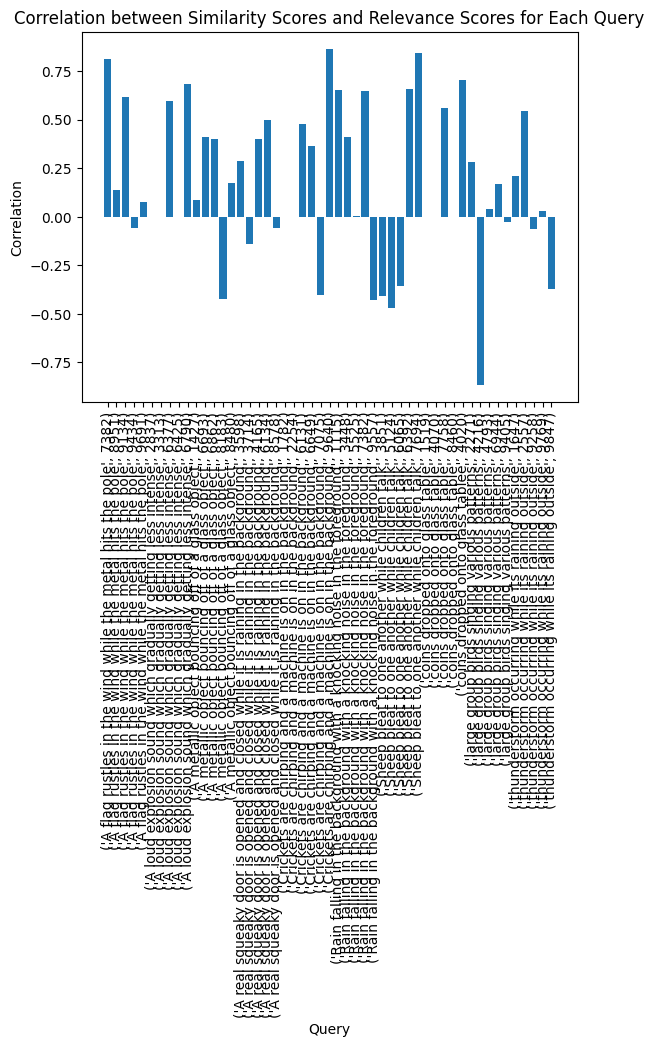

In [15]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv('../results_fgbg.csv')

# # Normalize the similarity scores from -1 to 1 to a range of 0 to 1
# data['normalized_similarity'] = data['similarity_score_by_model']

# Normalize the relevance scores from 1 to 10 to a range of 0 to 1
data['normalized_relevance'] = (data['user_relevance_score'] - 5.5) / 4.5

# Group the data by the query and batch index
grouped_data = data.groupby(['query', 'batch_index'])

correlations = []
query_labels = []

# Iterate over each group and compute the correlation coefficient
for group_name, group_data in grouped_data:
    similarity_scores = group_data['similarity_score_by_model']
    relevance_scores = group_data['normalized_relevance']

    # correlation, p_value = stats.pearsonr(similarity_scores, relevance_scores)
    correlation = similarity_scores.corr(relevance_scores)
    correlations.append(correlation)
    query_labels.append(str(group_name))

# Plotting the correlations
fig, ax = plt.subplots()

ax.bar(query_labels, correlations)
ax.set_xlabel('Query')
ax.set_ylabel('Correlation')
ax.set_title('Correlation between Similarity Scores and Relevance Scores for Each Query')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


/var/folders/jh/8qnr5mvd3rlc1zcpbx5xqb_h0000gn/T/ipykernel_34608/1849030339.py:68: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


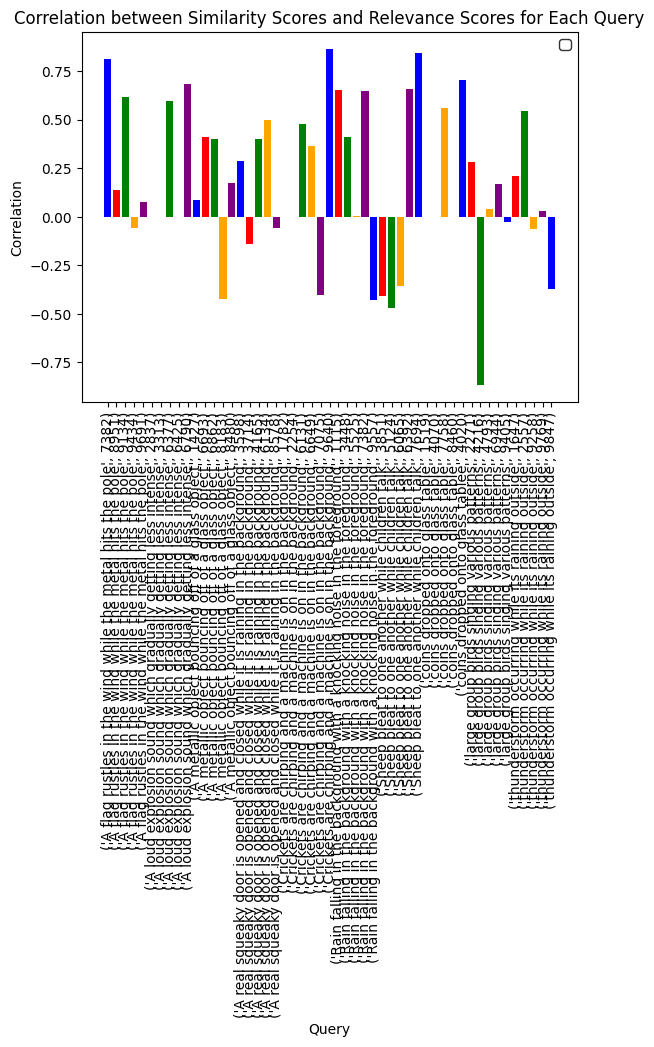

In [45]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv('../results_fgbg.csv')

# # Normalize the similarity scores from -1 to 1 to a range of 0 to 1
# data['normalized_similarity'] = data['similarity_score_by_model']

# Normalize the relevance scores from 1 to 10 to a range of 0 to 1
data['normalized_relevance'] = (data['user_relevance_score'] - 5.5) / 4.5

# Group the data by the query and batch index
grouped_data = data.groupby(['query', 'batch_index'])

correlations = []
query_labels = []

colors = []

# Iterate over each group and compute the correlation coefficient
for group_name, group_data in grouped_data:
    similarity_scores = group_data['similarity_score_by_model']
    relevance_scores = group_data['normalized_relevance']

    correlation = similarity_scores.corr(relevance_scores)
    correlations.append(correlation)
    query_labels.append(str(group_name))

    # Assign a color to each data point
    colors.extend(['blue', 'red', 'green', 'orange', 'purple'] * 10)  # Add more colors as needed

# Plotting the correlations
fig, ax = plt.subplots()

# Create a button to toggle the visibility of each color
button_labels = ['Blue', 'Red', 'Green', 'Orange', 'Purple']  # Add more labels as needed
button_colors = ['blue', 'red', 'green', 'orange', 'purple']  # Add more colors as needed
visibility = [True] * len(button_labels)  # Initially set 


def toggle_visibility(event):
    index = button_labels.index(event.artist.get_label())
    visibility[index] = not visibility[index]
    for bar in ax.containers:
        bar[index].set_visible(visibility[index])
    plt.draw()

# Plotting the colored bars
bars = ax.bar(query_labels, correlations, color=colors)

# Create the legend and control buttons
handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in button_colors]
ax.legend(handles, button_labels)
ax.legend().get_frame().set_edgecolor('black')

# Connect the button press event to toggle_visibility function
fig.canvas.mpl_connect('pick_event', toggle_visibility)

ax.set_xlabel('Query')
ax.set_ylabel('Correlation')
ax.set_title('Correlation between Similarity Scores and Relevance Scores for Each Query')

plt.xticks(rotation=90)
# plt.xticks(rotation=90)
plt.tight_layout()

# In this modified code, we introduce a colors list to assign a different color to each data point. Each group of 10 results of each query is assigned a specific color. We then create control buttons using the legend feature to toggle the visibility of each color. Clicking on a button will show or hide the corresponding color on the chart.
plt.show()
